# Spotify Recommendation Algorithm

### Spotify Authentication

In [9]:
# Import libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Set account info
cid = '81fee852cceb4259910e7d2ff78493c3'
secret = 'ad4360215d7641ee809275cc5cdd4a6c'
username = 'francescab13'

# Connect and create Spotify instance
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Data Gathering

#### Retrieve track ID's from 'Like' and 'Dislike' playlists

In [2]:
# Get data from 'Likes' playlist
good_ids = []
pl_id = 'spotify:playlist:2O6XH1ip37KOllmc1KoYEs'
offset = 0

while True:
    response = sp.playlist_tracks(pl_id,
                                  offset=offset,
                                  fields='items.track.id,total')
    good_ids.append(response['items'])
    offset = offset + len(response['items'])

    if len(response['items']) == 0:
        break

# Flatten list of lists of JSON
good_flatten = []
for sublist in good_ids:
    for item in sublist:
        good_flatten.append(item)

# Check good track ID list
good_flatten[0:5]

[{'track': {'id': '75Q69chmd8CEZbVsA4CDMm'}},
 {'track': {'id': '38kjIfRtXsUxXyzhsKwX7i'}},
 {'track': {'id': '1YT8xkroYGNLGR4qhuWLC4'}},
 {'track': {'id': '76gYk9g0bZj47NyIKzjLF6'}},
 {'track': {'id': '7tvuLLroI0n6uYBWuFig5d'}}]

In [3]:
# Get data from 'Dislikes' playlist
bad_ids = []
pl_id = 'spotify:playlist:58KlzYsGNQoujtrQc2CU5d'
offset = 0

while True:
    response = sp.playlist_tracks(pl_id,
                                  offset=offset,
                                  fields='items.track.id,total')
    bad_ids.append(response['items'])
    offset = offset + len(response['items'])

    if len(response['items']) == 0:
        break

# Flatten list of lists of JSON
bad_flatten = []
for sublist in bad_ids:
    for item in sublist:
        bad_flatten.append(item)
        
# Check bad track ID list
bad_flatten[0:5]

[{'track': {'id': '1YwNlWLf8auhazSQUDQLFU'}},
 {'track': {'id': '1xShPgQbOUa98avWJQFDBY'}},
 {'track': {'id': '3GREm6zSHwKZsJxl0hqbAQ'}},
 {'track': {'id': '0C6EIiQu8CS4eYtOCMEiAd'}},
 {'track': {'id': '0puf9yIluy9W0vpMEUoAnN'}}]

#### Get track characteristic data

In [4]:
# Compile list of 'good' track IDs
good_id_list = []
for i in range(0, len(good_flatten)):
    good_id_list.append(good_flatten[i]['track']['id'])
good_id_list = [x for x in good_id_list if x]

# Retrieve track characteristics
good_features = []
for i in range(0, len(good_id_list)):
    if not good_id_list[i]:
        continue
    else:
        good_features.append(sp.audio_features(good_id_list[i]))

# Flatten JSON list
good_features_flat = []
for sublist in good_features:
    for item in sublist:
        good_features_flat.append(item)
        
# Check 'good' features list
good_features_flat[0:3]

[{'danceability': 0.833,
  'energy': 0.545,
  'key': 2,
  'loudness': -4.004,
  'mode': 0,
  'speechiness': 0.462,
  'acousticness': 0.352,
  'instrumentalness': 0,
  'liveness': 0.0915,
  'valence': 0.541,
  'tempo': 77.035,
  'type': 'audio_features',
  'id': '75Q69chmd8CEZbVsA4CDMm',
  'uri': 'spotify:track:75Q69chmd8CEZbVsA4CDMm',
  'track_href': 'https://api.spotify.com/v1/tracks/75Q69chmd8CEZbVsA4CDMm',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/75Q69chmd8CEZbVsA4CDMm',
  'duration_ms': 148494,
  'time_signature': 4},
 {'danceability': 0.596,
  'energy': 0.248,
  'key': 0,
  'loudness': -14.576,
  'mode': 0,
  'speechiness': 0.274,
  'acousticness': 0.794,
  'instrumentalness': 0,
  'liveness': 0.0872,
  'valence': 0.189,
  'tempo': 112.043,
  'type': 'audio_features',
  'id': '38kjIfRtXsUxXyzhsKwX7i',
  'uri': 'spotify:track:38kjIfRtXsUxXyzhsKwX7i',
  'track_href': 'https://api.spotify.com/v1/tracks/38kjIfRtXsUxXyzhsKwX7i',
  'analysis_url': 'https://api.spotif

In [5]:
# Compile list of 'bad' track IDs
bad_id_list = []
for i in range(0, len(bad_flatten)):
    bad_id_list.append(bad_flatten[i]['track']['id'])
bad_id_list = [x for x in bad_id_list if x]

# Retrieve track characteristics
bad_features = []
for i in range(0, len(bad_id_list)):
    if not bad_id_list[i]:
        continue
    else:
        bad_features.append(sp.audio_features(bad_id_list[i]))

# Flatten JSON list
bad_features_flat = []
for sublist in bad_features:
    for item in sublist:
        bad_features_flat.append(item)
        
# Check 'bad' features list
bad_features_flat[0:3]

[{'danceability': 0.641,
  'energy': 0.812,
  'key': 0,
  'loudness': -7.945,
  'mode': 0,
  'speechiness': 0.0293,
  'acousticness': 0.155,
  'instrumentalness': 4.43e-05,
  'liveness': 0.078,
  'valence': 0.822,
  'tempo': 112.777,
  'type': 'audio_features',
  'id': '1YwNlWLf8auhazSQUDQLFU',
  'uri': 'spotify:track:1YwNlWLf8auhazSQUDQLFU',
  'track_href': 'https://api.spotify.com/v1/tracks/1YwNlWLf8auhazSQUDQLFU',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1YwNlWLf8auhazSQUDQLFU',
  'duration_ms': 257333,
  'time_signature': 4},
 {'danceability': 0.637,
  'energy': 0.682,
  'key': 11,
  'loudness': -11.625,
  'mode': 1,
  'speechiness': 0.0366,
  'acousticness': 0.0112,
  'instrumentalness': 0.0234,
  'liveness': 0.0473,
  'valence': 0.714,
  'tempo': 129.983,
  'type': 'audio_features',
  'id': '1xShPgQbOUa98avWJQFDBY',
  'uri': 'spotify:track:1xShPgQbOUa98avWJQFDBY',
  'track_href': 'https://api.spotify.com/v1/tracks/1xShPgQbOUa98avWJQFDBY',
  'analysis_url': 'ht

#### Create dataframes for 'liked' and 'disliked' tracks with audio features

In [6]:
# Create 'Like' dataframe
like_df = pd.DataFrame.from_records(good_features_flat)

# Retrieve song and artist names to add to dataframe
good_song_names = []
good_artists = []
for index, row in like_df.iterrows():
    try:
        response = sp.track(str(row['uri']))
        good_song_names.append(response['name'])
        good_artists.append(response['artists'][0]['name'])
    except SpotifyException as e:
        good_song_names.append('Unknown')
        good_artists.append('Unknown')

# Create 'song_name' and 'artist' columns
like_df['song_name'] = good_song_names
like_df['artist'] = good_artists

# Check dataframe
like_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0.833,0.545,2,-4.004,0,0.4620,0.352000,0.000,0.0915,0.541,77.035,audio_features,75Q69chmd8CEZbVsA4CDMm,spotify:track:75Q69chmd8CEZbVsA4CDMm,https://api.spotify.com/v1/tracks/75Q69chmd8CE...,https://api.spotify.com/v1/audio-analysis/75Q6...,148494,4,Gorgeous,mansionz
1,0.596,0.248,0,-14.576,0,0.2740,0.794000,0.000,0.0872,0.189,112.043,audio_features,38kjIfRtXsUxXyzhsKwX7i,spotify:track:38kjIfRtXsUxXyzhsKwX7i,https://api.spotify.com/v1/tracks/38kjIfRtXsUx...,https://api.spotify.com/v1/audio-analysis/38kj...,383025,4,i'm thinking about horses,mansionz
2,0.546,0.771,3,-7.560,0,0.1160,0.011700,0.351,0.3350,0.701,130.224,audio_features,1YT8xkroYGNLGR4qhuWLC4,spotify:track:1YT8xkroYGNLGR4qhuWLC4,https://api.spotify.com/v1/tracks/1YT8xkroYGNL...,https://api.spotify.com/v1/audio-analysis/1YT8...,265947,4,Number 9,Moon Hooch
3,0.515,0.827,7,-5.423,1,0.0923,0.000361,0.838,0.1380,0.427,173.988,audio_features,76gYk9g0bZj47NyIKzjLF6,spotify:track:76gYk9g0bZj47NyIKzjLF6,https://api.spotify.com/v1/tracks/76gYk9g0bZj4...,https://api.spotify.com/v1/audio-analysis/76gY...,246094,4,Execute,Excision
4,0.387,0.678,0,-8.399,1,0.0817,0.001080,0.872,0.1010,0.368,172.641,audio_features,7tvuLLroI0n6uYBWuFig5d,spotify:track:7tvuLLroI0n6uYBWuFig5d,https://api.spotify.com/v1/tracks/7tvuLLroI0n6...,https://api.spotify.com/v1/audio-analysis/7tvu...,562707,3,Lateralus,TOOL


In [7]:
# Create 'Dislike' dataframe
dislike_df = pd.DataFrame.from_records(bad_features_flat)

# Retrieve song and artist names to add to dataframe
bad_song_names = []
bad_artists = []
for index, row in dislike_df.iterrows():
    try:
        response = sp.track(str(row['uri']))
        bad_song_names.append(response['name'])
        bad_artists.append(response['artists'][0]['name'])
    except SpotifyException as e:
        bad_song_names.append('Unknown')
        bad_artists.append('Unknown')

# Create 'song_name' and 'artist' columns
dislike_df['song_name'] = bad_song_names
dislike_df['artist'] = bad_artists

# Check dataframe
dislike_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0.641,0.812,0,-7.945,0,0.0293,0.1550,0.000044,0.0780,0.822,112.777,audio_features,1YwNlWLf8auhazSQUDQLFU,spotify:track:1YwNlWLf8auhazSQUDQLFU,https://api.spotify.com/v1/tracks/1YwNlWLf8auh...,https://api.spotify.com/v1/audio-analysis/1YwN...,257333,4,Enjoy the Silence - Single Mix,Depeche Mode
1,0.637,0.682,11,-11.625,1,0.0366,0.0112,0.023400,0.0473,0.714,129.983,audio_features,1xShPgQbOUa98avWJQFDBY,spotify:track:1xShPgQbOUa98avWJQFDBY,https://api.spotify.com/v1/tracks/1xShPgQbOUa9...,https://api.spotify.com/v1/audio-analysis/1xSh...,224907,4,Personal Jesus - Original Single Version,Depeche Mode
2,0.679,0.829,9,-7.288,0,0.0604,0.0875,0.000002,0.3180,0.812,119.960,audio_features,3GREm6zSHwKZsJxl0hqbAQ,spotify:track:3GREm6zSHwKZsJxl0hqbAQ,https://api.spotify.com/v1/tracks/3GREm6zSHwKZ...,https://api.spotify.com/v1/audio-analysis/3GRE...,232080,4,People Are People - 2006 Remaster,Depeche Mode
3,0.678,0.658,8,-7.300,1,0.0280,0.0093,0.239000,0.1180,0.359,114.209,audio_features,0C6EIiQu8CS4eYtOCMEiAd,spotify:track:0C6EIiQu8CS4eYtOCMEiAd,https://api.spotify.com/v1/tracks/0C6EIiQu8CS4...,https://api.spotify.com/v1/audio-analysis/0C6E...,294040,4,Policy of Truth - 2006 Remaster,Depeche Mode
4,0.706,0.786,0,-3.417,0,0.0910,0.2600,0.000000,0.3800,0.751,150.028,audio_features,0puf9yIluy9W0vpMEUoAnN,spotify:track:0puf9yIluy9W0vpMEUoAnN,https://api.spotify.com/v1/tracks/0puf9yIluy9W...,https://api.spotify.com/v1/audio-analysis/0puf...,199387,4,Bang Bang,Jessie J


## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220BDB89630>,
      dtype=object)

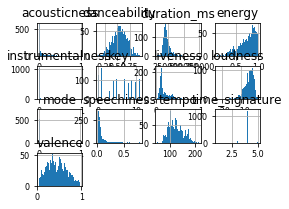

In [10]:
# Create list of audio feature column names
trait_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Histograms
like_df.hist(figsize=(4, 3), bins=50, xlabelsize=8, ylabelsize=8)